In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split 
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_both = pd.read_csv("train_both.csv")
test_only = pd.read_csv("only_test.csv")


#data_feature_names = ['campaign_id', 'total_links', 'no_of_internal_links', 'no_of_images', 'no_of_sections', 'no_of_emails_is_open_bucket_avg_val', 'no_of_emails_is_click_bucket_avg_val', 'user_id_is_click_bucket_avg_val', 'user_id_is_open_bucket_avg_val','cumulative_count', 'has_opened', 'has_clicked', 'no_of_emails', 'day_of_week', 'hour_of_day', 'campaign_29', 'campaign_30', 'campaign_31', 'campaign_32', 'campaign_33', 'campaign_34', 'campaign_35', 'campaign_36', 'campaign_37', 'campaign_38', 'campaign_39', 'campaign_40', 'campaign_41', 'campaign_42', 'campaign_43', 'campaign_44', 'campaign_45', 'campaign_46', 'campaign_47', 'campaign_48', 'campaign_49', 'campaign_50', 'campaign_51', 'campaign_52', 'campaign_53', 'campaign_54', 'conference_percent', 'corporate_percent', 'hackathon_percent', 'newsletter_percent', 'others_percent', 'upcoming_events_percent', 'webinar_percent']
data_feature_names = ['campaign_id', 'total_links', 'no_of_internal_links', 'no_of_images', 'no_of_sections', 'no_of_emails_is_open_bucket_avg_val', 'no_of_emails_is_click_bucket_avg_val', 'user_id_is_click_bucket_avg_val', 'user_id_is_open_bucket_avg_val','cumulative_count',                              'no_of_emails', 'day_of_week', 'hour_of_day', 'campaign_29', 'campaign_30', 'campaign_31', 'campaign_32', 'campaign_33', 'campaign_34', 'campaign_35', 'campaign_36', 'campaign_37', 'campaign_38', 'campaign_39', 'campaign_40', 'campaign_41', 'campaign_42', 'campaign_43', 'campaign_44', 'campaign_45', 'campaign_46', 'campaign_47', 'campaign_48', 'campaign_49', 'campaign_50', 'campaign_51', 'campaign_52', 'campaign_53', 'campaign_54', 'conference_percent', 'corporate_percent', 'hackathon_percent', 'newsletter_percent', 'others_percent', 'upcoming_events_percent', 'webinar_percent'] 
X = train_both[data_feature_names] 
y = train_both.is_click

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


       #Build model on training data

    # put options in here to prune tree
#classifier=DecisionTreeClassifier()
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
classifier=classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

In [8]:
train_both.head()

,Unnamed: 0,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,no_of_emails_is_open_bucket_avg_val,no_of_emails_is_click_bucket_avg_val,user_id_is_click_bucket_avg_val,user_id_is_open_bucket_avg_val,user_id,id_x,is_open,is_click,cumulative_count,has_opened,has_clicked,date,no_of_emails,day_of_week,hour_of_day,train,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_36,campaign_37,campaign_38,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_44,campaign_45,campaign_46,campaign_47,campaign_48,campaign_49,campaign_50,campaign_51,campaign_52,campaign_53,campaign_54,conference_percent,corporate_percent,hackathon_percent,newsletter_percent,others_percent,upcoming_events_percent,webinar_percent,000,2017,2018,50,action,ahead,allen,anand,and,announcing,articles,artificial,at,attend,av,before,bhu,big,biggest,bird,booz,borne,boss,business,by,can,ceo,chance,chat,chief,churn,click,codefest,coming,competitions,conference,convince,cross,data,datafest,datahack,day,days,delhi,dhs2017,dj,dr,early,emerging,ends,exciting,expert,expires,fireside,for,former,go,gramener,grow,hackathon,hackathons,hamilton,iit,in,india,innovate,inr,intelligence,is,job,join,july,just,keynote,kirk,lacs,largest,last,learning,live,look,machine,meetups,month,more,much,mumbai,ncr,new,newsletter,non,november,now,october,of,offer,on,opportunities,participate,passes,patil,peek,prediction,prizes,programmers,reasons,register,roles,save,science,scientist,sell,september,set,should,sneak,spot,stage,starts,summit,the,through,to,today,tonight,updates,upto,us,visualizing,watch,way,webinar,webinars,why,win,with,world,worth,you,your,campaign_id
0,0,Newsletter,67,61,12,3,"Dear AVians,\r\r\n \r\r\nWe are shaping up a s...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...,0.106471,0.009791,0.011316,0.093078,383,29_383,0,0,1,0.0,0.0,2017-07-01 18:04:00,2,5,18,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.228605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36655,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.36655,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36655,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.246952,0.0,0.0,0.0,0.0,0.0,0.36655,0.0,0.0,0.000000,0.0,0.362071,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.36655,0.0,0.0,0.000000,29
1,2,Hackathon,7,3,2,1,Click Prediction\r\r\nData Science Hackathon\r...,[Starts Tonight] Click Prediction Hackathon | ...,http://r.newsletters.analyticsvidhya.com/7vj1a...,0.106471,0.009791,0.011316,0.093078,383,46_383,0,0,0,1.0,0.0,2017-09-14 13:40:00,2,3,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343719,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300052,0.0,0.0,0.0,0.0,0.0,0.0,0.29187,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.343719,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.328679,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.372247,0.0,0.000000,0.0,0.0,0.0,0.372247,0.0,0.343719,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.29187,0.0,0.00000,0.0,0.0,0.000000,46
2,4,Newsletter,67,61,12,3,"Dear AVians,\r\r\n \r\r\nWe are shaping up a s...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...,0.106471,0.009791,0.011316,0.093078,816

In [7]:
X.head()


,campaign_id,total_links,no_of_internal_links,no_of_images,no_of_sections,no_of_emails_is_open_bucket_avg_val,no_of_emails_is_click_bucket_avg_val,user_id_is_click_bucket_avg_val,user_id_is_open_bucket_avg_val,cumulative_count,no_of_emails,day_of_week,hour_of_day,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_36,campaign_37,campaign_38,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_44,campaign_45,campaign_46,campaign_47,campaign_48,campaign_49,campaign_50,campaign_51,campaign_52,campaign_53,campaign_54,conference_percent,corporate_percent,hackathon_percent,newsletter_percent,others_percent,upcoming_events_percent,webinar_percent
0,29,67,61,12,3,0.106471,0.009791,0.011316,0.093078,1,2,5,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.5,0.5,0.0,0.0,0.0
1,46,7,3,2,1,0.106471,0.009791,0.011316,0.093078,0,2,3,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.5,0.5,0.0,0.0,0.0
2,29,67,61,12,3,0.106471,0.009791,0.011316,0.093078,1,2,6,18,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.5,0.0,0.5,0.0
3,30,18,14,7,1,0.106471,0.009791,0.011316,0.093078,0,2,2,14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.5,0.0,0.5,0.0
4,29,67,61,12,3,0.106471,0.009791,0.012050,0.099892,0,2,5,18,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[241610,      0],
       [  3095,      0]], dtype=int64)

In [5]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.98735211785619414

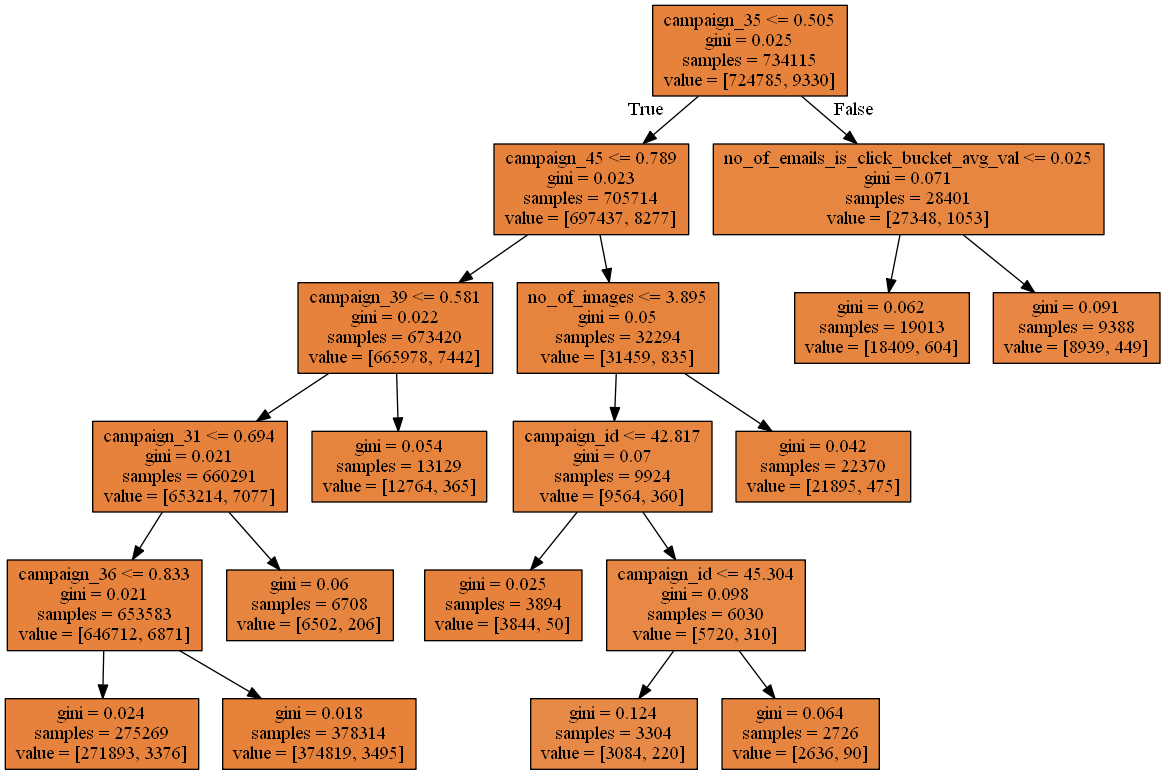

In [6]:



#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out,feature_names = data_feature_names, filled = True)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [ ]:
	#Save the decision tree as an image
with open('optimumPriceALLPREDICTORS.png', 'wb') as f:
    f.write(graph.create_png())

Tree will tell us most ipomrtant variables

run any form of regression you have studied. 

Possibly random forest --- or gradient boosting

top3-4 vars
create variable encodign from decision tree
look at judgement point in decision tree.  i.e. if hackathon > 0.5
so you can create a 1-0 variable where hackathon is > 0.5 
Now having made that feature, you can run random forest or xgboost
2 data sets
train and test common - customer base clickrate encoding - at ustomer level what percentage of clickrate for that customer.  And all other features.  

only train